# Session 0: Linear Algebra

This notebook is a simple translation of the linear algebra revision lecture into Python constructs, using numpy

In [1]:
import numpy as np

In [2]:
np.random.seed(42)

Please note that Python uses 0-based indexing, as does the rest of this notebook

## Basic Notation

$A \in \mathbb{R}^{m x n}$ is a matrix with m rows and n columns

In [3]:
m = 5
n = 3
A = np.random.randn(m, n)
A

array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473, -0.46947439],
       [ 0.54256004, -0.46341769, -0.46572975],
       [ 0.24196227, -1.91328024, -1.72491783]])

$x \in \mathbb{R}^{n}$ is a vector with n rows

In [4]:
x = np.random.randn(n)
x

array([-0.56228753, -1.01283112,  0.31424733])

$a_{ij}$ is the entry in the ith row and jth column of A

In [5]:
i = 2
j = 1
a_ij = A[i][j]
a_ij

0.76743472915290878

## Matrix Multiplication

The product of two matrixes $A \in \mathbb{R}^{m x n}$ and $B \in \mathbb{R}^{n x p}$ is the matrix 

$C = AB \in \mathbb{R}^{m x p}$ where 

$C_{ij} = \sum_{k=1}^{n} A_{ik} B_{kj}$

In [6]:
p = 6
B = np.random.randn(n, p)
B

array([[-0.90802408, -1.4123037 ,  1.46564877, -0.2257763 ,  0.0675282 ,
        -1.42474819],
       [-0.54438272,  0.11092259, -1.15099358,  0.37569802, -0.60063869,
        -0.29169375],
       [-0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
        -1.22084365]])

In [7]:
C = np.matmul(A, B)
C

array([[-0.76547819,  0.48285148,  0.87840781, -0.84915915,  0.64934202,
        -1.45808819],
       [-1.11459697, -2.61064038,  2.50489606, -0.18418579,  0.05090089,
        -1.81578833],
       [-1.56925562, -3.01479942,  1.43759548,  0.42834307, -0.74047335,
        -1.90068169],
       [ 0.03985168, -1.68032411,  1.33487931,  0.19600514, -0.06809894,
        -0.06925218],
       [ 1.85974361, -3.74897788,  2.58008658,  1.0510195 , -0.25329297,
         2.31921156]])

In [8]:
# Sanity check:
C_manual = np.zeros((m, p))
for i in range(m):
    for j in range(p):
        for k in range(n):
            C_manual[i][j] += A[i][k] * B[k][j]

C_manual

array([[-0.76547819,  0.48285148,  0.87840781, -0.84915915,  0.64934202,
        -1.45808819],
       [-1.11459697, -2.61064038,  2.50489606, -0.18418579,  0.05090089,
        -1.81578833],
       [-1.56925562, -3.01479942,  1.43759548,  0.42834307, -0.74047335,
        -1.90068169],
       [ 0.03985168, -1.68032411,  1.33487931,  0.19600514, -0.06809894,
        -0.06925218],
       [ 1.85974361, -3.74897788,  2.58008658,  1.0510195 , -0.25329297,
         2.31921156]])

In [9]:
print(A.shape)
print(B.shape)
print(C.shape)

(5, 3)
(3, 6)
(5, 6)


### Vector-Vector Products

Given two vectors $x, y \in \mathbb{R}^{n}$, $x^{T}y$, called the inner product or dot product, is a real number given by:

$x^{T}y \in \mathbb{R} = \sum_{i=1}^{n} x_{i} y_{i}$

In [10]:
x = np.random.randn(n)
y = np.random.randn(n)
print(x)
print(y)

[ 0.2088636  -1.95967012 -1.32818605]
[ 0.19686124  0.73846658  0.17136828]


In [11]:
np.dot(x, y)

-1.6336427091601982

In [12]:
# Sanity check
dot_prod = 0
for i in range(n):
    dot_prod += x[i] * y[i]
    
dot_prod

-1.6336427091601982

Given $x \in \mathbb{R}^{m}, y \in \mathbb{R}^{n}$

$xy^T \in \mathbb{R}^{m x n}$ is called the outer product of the vectors.

In [13]:
x = np.random.randn(m)
y = np.random.randn(n)
print(x)
print(y)

[-0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877]
[ 1.05712223  0.34361829 -1.76304016]


In [14]:
np.outer(x, y)

array([[-0.12225437, -0.03973886,  0.20389257],
       [-0.31830341, -0.10346474,  0.53085791],
       [-1.56297846, -0.5080472 ,  2.60669364],
       [-0.76096331, -0.24735164,  1.26911425],
       [-0.48695148, -0.15828391,  0.81212465]])

### Matrix-Vector Products

Given a matrix $A \in \mathbb{R}^{m x n}$ and a vector $x \in \mathbb{R}^{n}$, their product is a vector 

$y = Ax \in \mathbb{R}^{m}$

In [15]:
A.shape # m x n

(5, 3)

In [16]:
x = np.random.randn(A.shape[1])
x

array([ 0.32408397, -0.38508228, -0.676922  ])

In [17]:
x.shape # n

(3,)

In [18]:
y = np.matmul(A, x)
y

array([-0.22421439,  0.74225033,  0.53406958,  0.66955167,  1.98282124])

In [19]:
y.shape # should be m

(5,)

### Matrix-Matrix Products

This was already covered above. Some basic properties

  * Matrix multiplication is associative, i.e. $ABC = (AB)C = A(BC)$
  * Matrix multiplication is distributive, i.e. $A(B + C) = AB + AC$
  * Matrix multiplication is **not** commutative, i.e. $AB \ne BA$ (in general)  

## Operations and Properties

### The Identity Matrix and Diagonal Matrices

The identity matrix $I_{n} \in \mathbb{R}^{n x n}$ is a square matrix with ones on the diagonal and zeros everywhere else

In [20]:
I = np.identity(n)
I

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

It has the property that for all $A \in \mathbb{R}^{m x n}$:
    
$AI_{n} = A = I_{m}A$

In [21]:
A

array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473, -0.46947439],
       [ 0.54256004, -0.46341769, -0.46572975],
       [ 0.24196227, -1.91328024, -1.72491783]])

In [22]:
np.matmul(A, np.identity(A.shape[1]))

array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473, -0.46947439],
       [ 0.54256004, -0.46341769, -0.46572975],
       [ 0.24196227, -1.91328024, -1.72491783]])

In [23]:
np.matmul(np.identity(A.shape[0]), A)

array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473, -0.46947439],
       [ 0.54256004, -0.46341769, -0.46572975],
       [ 0.24196227, -1.91328024, -1.72491783]])

A diagonal matrix is a matrix where all non-diagonal elements are 0

In [24]:
D = np.identity(n) * np.random.randn(n)
D

array([[ 0.61167629,  0.        ,  0.        ],
       [ 0.        ,  1.03099952,  0.        ],
       [ 0.        ,  0.        ,  0.93128012]])

### The Transpose

The transpose of a matrix results from "flipping" the rows and columns

In [25]:
A.T

array([[ 0.49671415,  1.52302986,  1.57921282,  0.54256004,  0.24196227],
       [-0.1382643 , -0.23415337,  0.76743473, -0.46341769, -1.91328024],
       [ 0.64768854, -0.23413696, -0.46947439, -0.46572975, -1.72491783]])

A square matrix $A \in \mathbb{R}^{n x n}$ is symmetric if $A = A^T$, and anti-symmetric if $A = -A^T$

For any matrix $A \in \mathbb{R}^{n x n}$, 

$A + A^T$ is symmetric and $A - A^T$ is anti-symmetric.

In [26]:
A = np.random.randn(n, n)
A

array([[-0.83921752, -0.30921238,  0.33126343],
       [ 0.97554513, -0.47917424, -0.18565898],
       [-1.10633497, -1.19620662,  0.81252582]])

In [27]:
A + A.T

array([[-1.67843505,  0.66633275, -0.77507154],
       [ 0.66633275, -0.95834848, -1.3818656 ],
       [-0.77507154, -1.3818656 ,  1.62505164]])

In [28]:
A - A.T

array([[ 0.        , -1.2847575 ,  1.43759841],
       [ 1.2847575 ,  0.        ,  1.01054765],
       [-1.43759841, -1.01054765,  0.        ]])

It follows that any matrix can be represented as a sum of a symmetric and anti-symmetric matrix:

$A = \frac{1}{2}(A + A^T) + \frac{1}{2}(A - A^T)$

In [29]:
0.5*(A + A.T) + 0.5*(A - A.T)

array([[-0.83921752, -0.30921238,  0.33126343],
       [ 0.97554513, -0.47917424, -0.18565898],
       [-1.10633497, -1.19620662,  0.81252582]])

### The Trace

The trace of a square matrix $A \in \mathbb{R}^{n x n}$, denoted as tr(A) is the sum of the diagonal elements:

In [30]:
A.trace()

-0.50586593867373053

In [31]:
tr = 0
for i in range(n):
    tr += A[i][i]
    
tr

-0.50586593867373053

### Norms

The norm of a vector $||x||$ is informally a measure of the length of the vector.

For example, we have the Euclidean or $l_{2}$ norm:

$||x||_{2} = \sqrt{\sum_{i=1}^{n} x_{i}^2}$

In [32]:
x

array([ 0.32408397, -0.38508228, -0.676922  ])

In [33]:
np.linalg.norm(x, ord=2)

0.8435295942689488

In [34]:
np.sqrt(np.dot(x,x.T))

0.8435295942689488

Other examples are $l_1$ norm:

$||x||_{1} = \sum_{i=1}^{n} |x_{i}|$

In [35]:
np.linalg.norm(x, ord=1)

1.3860882501170702

and the infinity norm:

$||x||_{\infty} = max_{i} |x_{i}|$

In [36]:
np.linalg.norm(x, ord=np.inf)

0.67692200030595873

All of the above are from the family of $l_p$ norms, which are parameterized by $p \geq 1$, and defined as 

$$||x_p|| = \left( \sum_{i=1}^{n} |x_{i}^p| \right)^\frac{1}{p}$$

Another important one is the Frobenius norm, for matrices

$||A||_{F} = \sqrt{tr(A^T A)}$

### Linear Independence and Rank

A set of vectors ${x_1, x_2, x_3...}$ are said to be linearly independent if no vector can be represented as a linear combination of the remaining vectors

The column rank of a matrix is the size of the largest subset of columns of A that constitute a linearly independent set

In [37]:
A = np.array([[1, 2, 3], [4, 5, 6], [9, 12, 15]])

In [38]:
A

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 9, 12, 15]])

In [39]:
np.linalg.matrix_rank(A)

2

### The Inverse

The inverse of a square matrix $A \in \mathbb{R}^{n x n}$ is denoted by $A^{-1}$, and is the unique matrix s.t. 

$A^{-1} A = I = AA^{-1}$

In [40]:
A = np.random.randn(n, n)
A

array([[ 1.35624003, -0.07201012,  1.0035329 ],
       [ 0.36163603, -0.64511975,  0.36139561],
       [ 1.53803657, -0.03582604,  1.56464366]])

In [41]:
A_inv = np.linalg.inv(A)
A_inv

array([[ 2.70796683, -0.20849188, -1.68868211],
       [ 0.02715442, -1.57233199,  0.3457551 ],
       [-2.66129553,  0.16894435,  2.30700572]])

In [42]:
np.matmul(A, A_inv)

array([[  1.00000000e+00,   5.05780563e-17,   0.00000000e+00],
       [ -1.96993814e-16,   1.00000000e+00,  -1.11022302e-16],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

In [43]:
np.matmul(A_inv, A)

array([[  1.00000000e+00,   3.71549568e-17,  -8.88178420e-16],
       [ -6.15912127e-17,   1.00000000e+00,  -1.11022302e-16],
       [  4.44089210e-16,  -1.38777878e-17,   1.00000000e+00]])

We say that $A$ is invertible or non-singular if $A^{-1}$ exists and non-invertible or singular otherwise

In order for a square matrix A to have an inverse, A must be full rank.

**Properties**

  * $(A^{-1})^{-1} = A$
  * $(AB)^{-1} = B^{-1}A^{-1}$
  * $(A^{-1})^T = (A^T)^{-1}$

### Orthogonal Matrices

Two vectors $x, y \in \mathbb{R}^{n}$ are orthogonal if $x^T y = 0$

In [44]:
x = np.array([5, 0, 0]) # vector along x-axis
y = np.array([0, 4, 0]) # vector along y-axis

In [45]:
print(x)
print(y)

[5 0 0]
[0 4 0]


In [46]:
np.dot(x.T, y)

0

A vector $x$ is normalized if $||x||_2 = 1$

In [47]:
x = np.array([1./np.sqrt(2), 1./np.sqrt(2)])

In [48]:
np.linalg.norm(x)

0.99999999999999989

A square matrix U is orthogonal if all its columns are orthogonal to each other and are normalized

In [49]:
U = np.array([[1./np.sqrt(2), 1./np.sqrt(2)], [-1./np.sqrt(2), 1./np.sqrt(2)]])
U

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [50]:
print(np.linalg.norm(U[:, 0]))
print(np.linalg.norm(U[:, 1]))

1.0
1.0


In [51]:
np.dot(U[:, 0], U[:, 1])

0.0

It follows immediately from the definition of orthogonality and normality that 

$U^T U = I = U U^T$

In [52]:
np.matmul(U.T, U)

array([[ 1.,  0.],
       [ 0.,  1.]])

In [53]:
np.matmul(U, U.T)

array([[ 1.,  0.],
       [ 0.,  1.]])

You can think about orthogonal matrices as a rotated version of the unit-vectors along the axes in an n-dimensional space.

For example, the above U is just 2 vectors along the x and y axes in 2D space, rotated at an angle of 45 degrees.

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5,1,'Visualizing Orthogonal Matrices as Rotated Axes')

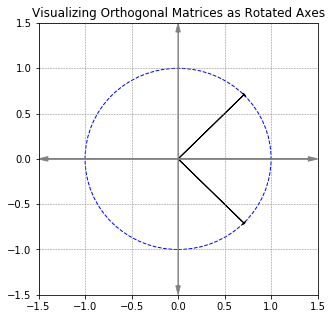

In [55]:
plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.grid(color='gray', linestyle='--', linewidth=0.5)

plt.xlim((-1.5, 1.5))
plt.ylim((-1.5, 1.5))

# The U matrix in 2D space
ax.arrow(0, 0, *U[:, 0], head_width=0.05, head_length=0.01)
ax.arrow(0, 0, *U[:, 1], head_width=0.05, head_length=0.01)

# x-axis
ax.arrow(0, 0, 1.4, 0, head_width=0.05, head_length=0.1, linewidth=1, color='gray')
ax.arrow(0, 0, -1.4, 0, head_width=0.05, head_length=0.1, linewidth=1, color='gray')

# y-axis
ax.arrow(0, 0, 0, 1.4, head_width=0.05, head_length=0.1, linewidth=0.7, color='gray')
ax.arrow(0, 0, 0, -1.4, head_width=0.05, head_length=0.1, linewidth=0.7, color='gray')

# Unit circle
circ = plt.Circle((0, 0), radius=1, edgecolor='b', facecolor='None', linestyle='--')
ax.add_patch(circ)

plt.title("Visualizing Orthogonal Matrices as Rotated Axes")

### Determinant

The determinant of a square matrix $A \in \mathbb{R}^{n x n}$ is a function $\mathbb{R}^{n x n} \rightarrow \mathbb{R}$, denoted as det A or $|A|$

In [56]:
A

array([[ 1.35624003, -0.07201012,  1.0035329 ],
       [ 0.36163603, -0.64511975,  0.36139561],
       [ 1.53803657, -0.03582604,  1.56464366]])

In [57]:
np.linalg.det(A)

-0.36796431478202435

### Eigenvalues and Eigenvectors

Given a square matrix A, we say that $\lambda \in \mathbb{C}$ is an eigenvalue of A and $x \in \mathbb{C}^{n}$ is the corresponding eigenvector if

$Ax = \lambda x, x \ne 0$

Intuitively, this definition means that multiplying A by the vector x results in a new vector
that points in the same direction as x, but scaled by a factor $\lambda$

Can be re-written as 

$(\lambda I - A)x = 0, x \ne 0$

$|\lambda I - A| = 0$

In [58]:
U

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [59]:
# Compute the eigenvalues and right eigenvectors of a square array.
eigenvalues, eigenvectors = np.linalg.eig(U)
print(eigenvalues)
print(eigenvectors)

[ 0.70710678+0.70710678j  0.70710678-0.70710678j]
[[ 0.70710678+0.j          0.70710678-0.j        ]
 [ 0.00000000+0.70710678j  0.00000000-0.70710678j]]


In [60]:
# Compute the eigenvalues of a general matrix.
np.linalg.eigvals(U)

array([ 0.70710678+0.70710678j,  0.70710678-0.70710678j])

**Properties:**

  1. The trace of A is equal to the sum of its eigenvalues
  2. The determinant of A is equal to the product of its eigenvalues
  3. The rank of A is equal to the number of non-zero eigenvalues of A.

In [61]:
print(np.trace(U))
print(sum(eigenvalues))

1.41421356237
(1.41421356237+0j)


In [62]:
print(np.linalg.det(U))
print(np.product(eigenvalues))

1.0
(1+0j)


In [63]:
print(np.linalg.matrix_rank(U))
print(sum(eigenvalues != 0))

2
2


### Eigenvalues and Eigenvectors of Symmetric Matrices

Two remarkable properties come about when we look at the eigenvalues and eigenvectors
of a symmetric matrix $A \in \mathbb{S}^n$.

1. All eigenvalues of A are real
2. The eigenvectors of A are orthonormal

In [64]:
A = np.random.randn(n, n)
A = A + A.T # Use the fact that A + A.T is symmetric
A

array([[-5.23949021,  0.52289515, -0.13262482],
       [ 0.52289515,  0.18352155, -1.63045634],
       [-0.13262482, -1.63045634,  2.95578809]])

In [65]:
eig_vals, eig_vectors = np.linalg.eig(A)
print(eig_vals)
print(eig_vectors)

[-5.28951678 -0.53329967  3.72263588]
[[-0.99537851  0.08816279 -0.03806489]
 [ 0.0959833   0.90114531 -0.42275802]
 [ 0.00296953  0.42445784  0.90544283]]


We can check for orthogonality of the matrix by computing the dot product of every column with every other column. Here is a nifty way to do it

In [66]:
orth_check = np.matmul(eig_vectors.T, eig_vectors)
orth_check

array([[  1.00000000e+00,   1.02656300e-16,  -3.33934269e-17],
       [  1.02656300e-16,   1.00000000e+00,  -2.77555756e-16],
       [ -3.33934269e-17,  -2.77555756e-16,   1.00000000e+00]])

In [67]:
# Round the really small ones, at a significance level of 13 decimal digits
np.around(orth_check, decimals=13)

array([[ 1.,  0., -0.],
       [ 0.,  1., -0.],
       [-0., -0.,  1.]])

Typically, the matrix of eigenvectors is represented using the letter U

In [68]:
U = eig_vectors
U

array([[-0.99537851,  0.08816279, -0.03806489],
       [ 0.0959833 ,  0.90114531, -0.42275802],
       [ 0.00296953,  0.42445784,  0.90544283]])

We can therefore represent A as $A = U \Lambda U^T$, remembering from above that the inverse of an orthogonal matrix is just its transpose

## The Gradient

The gradient of f w.r.t. $A \in \mathbb{R}^{m x n}$ is the matrix of partial derivatives, of dimensions $m x n$.

The gradient of f w.r.t. $x \in \mathbb{R}^{n}$ is the matrix of partial derivatives, of dimensions $n$.

In [69]:
from sympy import symbols, diff

In [70]:
x1, x2, x3 = symbols('x1 x2 x3', real=True)

In [71]:
diff(x1**2 + x2**3 + x3**4, x1)

2*x1

In [72]:
diff(x1**2 + x2**3 + x3**4, x2)

3*x2**2

In [73]:
diff(x1**2 + x2**3 + x3**4, x3)

4*x3**3

It is very important to remember that the gradient of a function is only defined if the function
is real-valued, that is, if it returns a scalar value.

In [74]:
def gradient(f, x):
    """Calculates the gradient of a function f w.r.t x"""
    
    syms = [x1, x2, x3]
    sub_dict = dict(zip(syms, x))
    return np.array([diff(f, s).subs(sub_dict) for s in syms])

In [75]:
inp_vector = np.array([1, 2, 3])
grads = gradient(x1**2 + x2**2 + x3**2, inp_vector)
grads

array([2, 4, 6], dtype=object)

As you can see, this is "symply" (eh, eh, get it?) the vector `2x`, which is the derivative of `x**2` (input)

In [76]:
2*inp_vector

array([2, 4, 6])

### The Least Squares Equation

If we have $Ax = b$, where $A \in \mathbb{R}^{m x n}$ and $b \in \mathbb{R}^{m}$ s.t. $b \notin R(A)$, then we want to find a vector $x$ such that $Ax$ is as close to b, as measured by the $l_2$ norm. It can be derived that the equation to solve this is:

$$x = (A^T A)^{-1} A^Tb$$